In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
path="C:/Users/KAVYA/Desktop/Internship_Project/26_fakebillprediction/fake_bills.csv"
data=pd.read_csv(path)
print(data)
print(data.info())
print(data.shape)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['is_genuine']=le.fit_transform(data['is_genuine'])
print(data)

print(data.isna().sum())

data[data['margin_low'].isnull()]

df=data['margin_low'].mean()
data['margin_low'].fillna(value=df,axis=0,inplace=True)
data.isna().sum()

inputs=data.drop('is_genuine','columns')
output=data['is_genuine']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,output,test_size=0.2)
print(x_train)
print(x_test)
print(y_train)
print(y_test)

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)
print(y_test)

from sklearn.metrics import accuracy_score
print('accuracy_score is:',accuracy_score(y_test,y_pred))

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

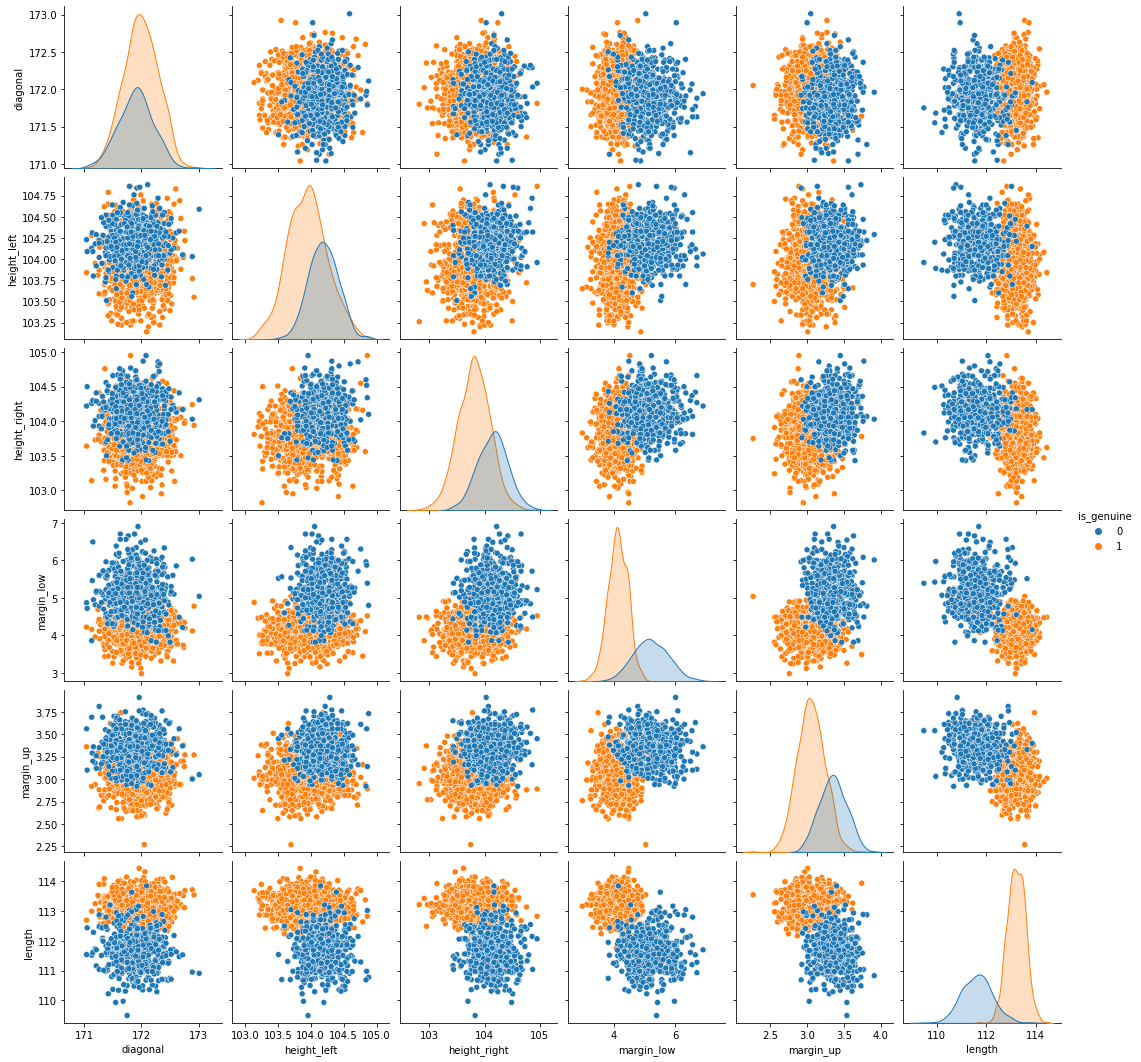

In [23]:
sns.pairplot(data,hue='is_genuine')

<AxesSubplot:title={'center':'Proportion of Fake bills and Original bills'}, ylabel='diagonal'>

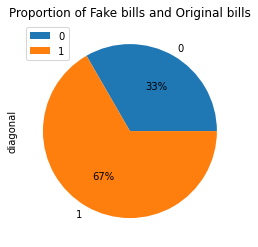

In [25]:
data.groupby(['is_genuine']).sum().plot(kind='pie',y='diagonal',autopct='%1.0f%%',title='Proportion of Fake bills and Original bills')